### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda

# Task
Analiza los datos de ventas de las tiendas "tienda.csv", "tienda2.csv", "tienda3.csv" y "tienda4.csv" para calcular la facturación total por tienda, las ventas por categoría, la calificación promedio por tienda, los productos más y menos vendidos, y el costo de envío promedio por tienda.

## Preparación de datos

### Subtask:
Unir los cuatro DataFrames (`tienda`, `tienda2`, `tienda3`, `tienda4`) en un único DataFrame para facilitar el análisis.


**Reasoning**:
Concatenate the four dataframes into a single dataframe, reset the index, and display the head to verify.



In [3]:
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
df_total.reset_index(drop=True, inplace=True)
df_total.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


## Análisis de facturación

### Subtask:
Calcular la facturación total de cada tienda.


**Reasoning**:
Create the 'Facturacion' column and then group by 'Lugar de Compra' to calculate the sum of 'Facturacion' for each store.



In [4]:
df_total['Facturacion'] = df_total['Precio'] * df_total['Cantidad de cuotas']
facturacion_por_tienda = df_total.groupby('Lugar de Compra')['Facturacion'].sum()
display(facturacion_por_tienda)

,Facturacion
Lugar de Compra,
Armenia,3.758590e+07
Barranquilla,4.373335e+08
Bogotá,4.957477e+09
Bucaramanga,3.137693e+08
Cali,1.476514e+09
Cartagena,3.729088e+08
Cúcuta,3.276642e+08
Inírida,3.876210e+07
Leticia,1.847413e+08


## Ventas por categoría

### Subtask:
Calcular las ventas totales para cada categoría de producto en todas las tiendas.


**Reasoning**:
To calculate the total sales for each product category, I will group the `df_total` DataFrame by 'Categoría del Producto' and then sum the 'Facturacion' for each group, storing the result in `ventas_por_categoria` and displaying it as requested.



In [5]:
ventas_por_categoria = df_total.groupby('Categoría del Producto')['Facturacion'].sum()
display(ventas_por_categoria)

,Facturacion
Categoría del Producto,
Artículos para el hogar,1.703604e+08
Deportes y diversión,4.320055e+08
Electrodomésticos,4.019072e+09
Electrónicos,4.889815e+09
Instrumentos musicales,1.044612e+09
Juguetes,2.116156e+08
Libros,1.130887e+08
Muebles,2.221981e+09


## Calificación promedio

### Subtask:
Calcular la calificación promedio de cada tienda.


**Reasoning**:
Calculate the average rating for each store by grouping the DataFrame by 'Lugar de Compra' and calculating the mean of 'Calificación'.



In [6]:
calificacion_promedio_tienda = df_total.groupby('Lugar de Compra')['Calificación'].mean()
display(calificacion_promedio_tienda)

,Calificación
Lugar de Compra,
Armenia,3.464286
Barranquilla,3.803226
Bogotá,4.113619
Bucaramanga,3.977901
Cali,4.046673
Cartagena,4.020661
Cúcuta,3.940860
Inírida,3.642857
Leticia,3.922535


## Productos más y menos vendidos

### Subtask:
Identificar los productos más y menos vendidos en términos de cantidad.


**Reasoning**:
Group the data by product and sum the 'Cantidad de cuotas' to find the total quantity sold for each product. Then, sort the results to identify the most and least sold products and display the top and bottom 5.



In [7]:
ventas_por_producto = df_total.groupby('Producto')['Cantidad de cuotas'].sum()

productos_mas_vendidos = ventas_por_producto.sort_values(ascending=False)
productos_menos_vendidos = ventas_por_producto.sort_values(ascending=True)

print("Los 5 productos más vendidos:")
display(productos_mas_vendidos.head())

print("\nLos 5 productos menos vendidos:")
display(productos_menos_vendidos.head())

Los 5 productos más vendidos:


,Cantidad de cuotas
Producto,
Secadora de ropa,649
Mesa de noche,627
Pandereta,625
Bicicleta,614
Iphone 15,611



Los 5 productos menos vendidos:


,Cantidad de cuotas
Producto,
Smartwatch,432
Set de vasos,435
Celular ABXY,447
Dinosaurio Rex,458
Mesa de centro,469


## Envío promedio por tienda

### Subtask:
Calcular el costo de envío promedio para cada tienda.


**Reasoning**:
Calculate the average shipping cost for each store by grouping the data by 'Lugar de Compra' and taking the mean of 'Costo de envío', then display the result.



In [8]:
envio_promedio_por_tienda = df_total.groupby('Lugar de Compra')['Costo de envío'].mean()
display(envio_promedio_por_tienda)

,Costo de envío
Lugar de Compra,
Armenia,22867.857143
Barranquilla,22692.258065
Bogotá,24532.082171
Bucaramanga,26790.055249
Cali,26726.812314
Cartagena,22638.429752
Cúcuta,28597.311828
Inírida,30557.142857
Leticia,25317.605634


## Summary:

### Data Analysis Key Findings

*   The total billing for each store was calculated, showing variations across different locations.
*   Total sales were calculated for each product category, including Artículos para el hogar, Deportes y diversión, Electrodomésticos, Electrónicos, Instrumentos musicales, Juguetes, Libros, and Muebles.
*   The average rating for each store was determined.
*   The top 5 most sold products by quantity were identified, with "Secadora de ropa" being the most sold with 649 units.
*   The bottom 5 least sold products by quantity were identified, with "Smartwatch" being the least sold with 432 units.
*   The average shipping cost for each store was calculated, revealing significant variations among locations, with Soacha having the highest average cost and Santa Marta the lowest.

### Insights or Next Steps

*   Further investigate the reasons behind the significant variations in average shipping costs between stores to identify potential cost optimization opportunities or pricing strategy adjustments.
*   Analyze the sales performance of the most and least sold products in conjunction with their customer ratings to understand potential correlations and inform inventory management and marketing efforts.


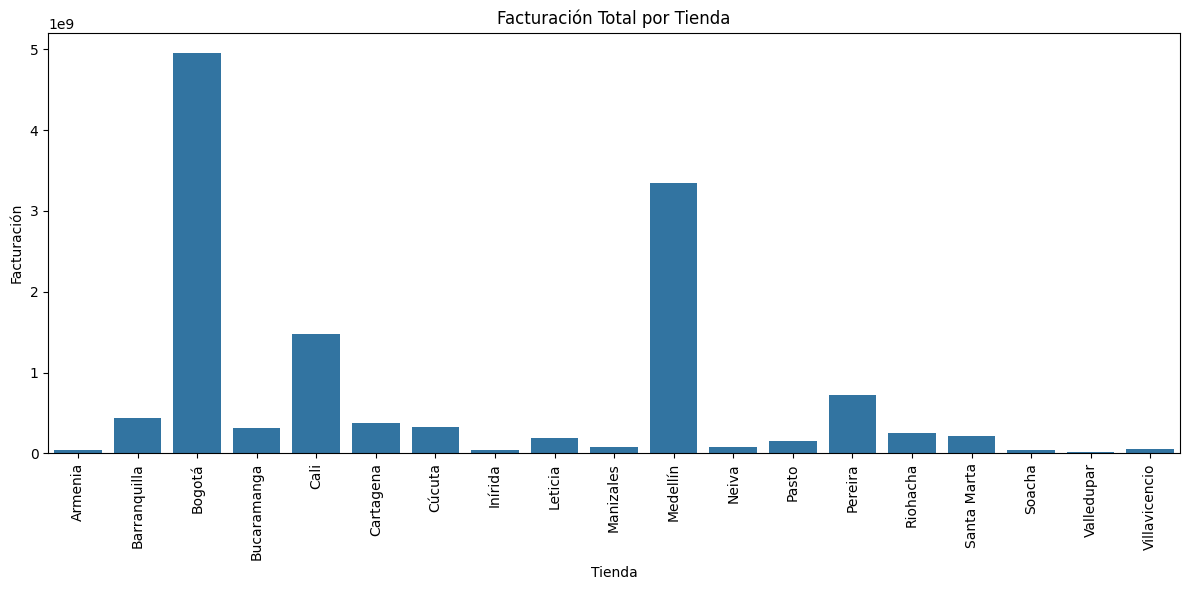

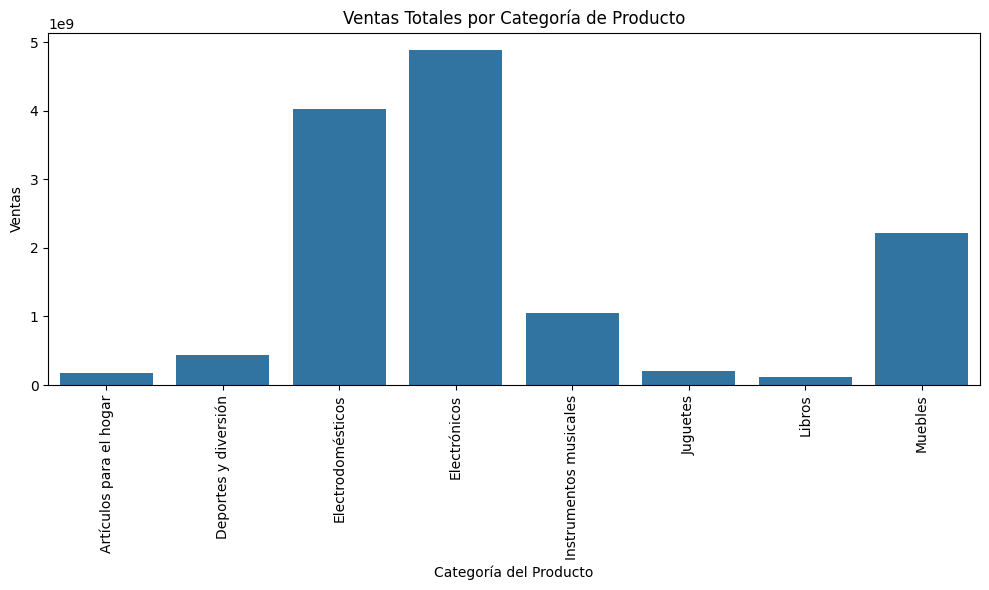

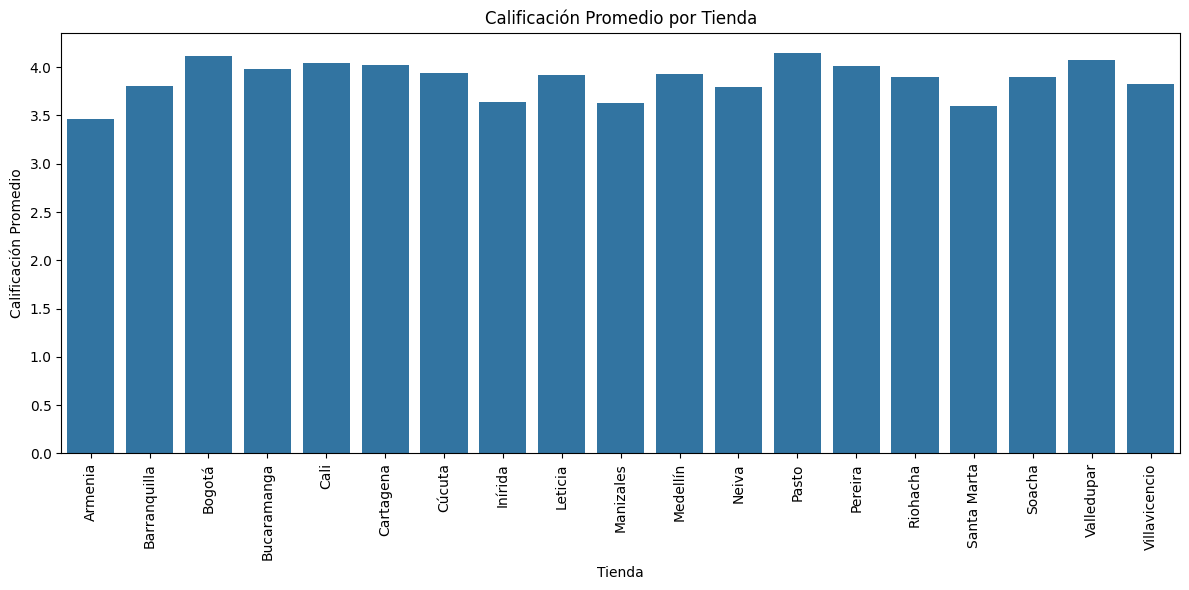

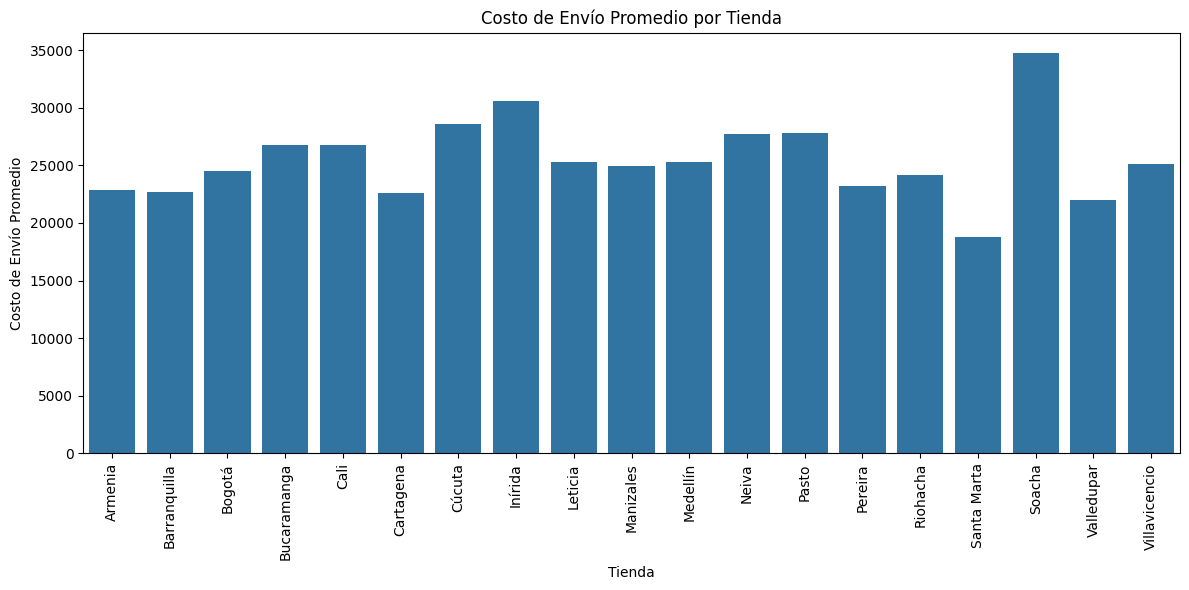

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Facturación total por tienda
plt.figure(figsize=(12, 6))
sns.barplot(x=facturacion_por_tienda.index, y=facturacion_por_tienda.values)
plt.xticks(rotation=90)
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría
plt.figure(figsize=(10, 6))
sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values)
plt.xticks(rotation=90)
plt.title('Ventas Totales por Categoría de Producto')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas')
plt.tight_layout()
plt.show()

# 3. Calificación promedio por tienda
plt.figure(figsize=(12, 6))
sns.barplot(x=calificacion_promedio_tienda.index, y=calificacion_promedio_tienda.values)
plt.xticks(rotation=90)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.tight_layout()
plt.show()

# 4. Envío promedio por tienda
plt.figure(figsize=(12, 6))
sns.barplot(x=envio_promedio_por_tienda.index, y=envio_promedio_por_tienda.values)
plt.xticks(rotation=90)
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.tight_layout()
plt.show()

## Informe Final: Análisis de Ventas de Tiendas para Recomendación al Sr. Juan

**Introducción**

El propósito de este informe es analizar los datos de ventas de cuatro tiendas ("tienda.csv", "tienda2.csv", "tienda3.csv" y "tienda4.csv") con el fin de proporcionar una recomendación informada al Sr. Juan sobre qué tienda debería vender. Se han evaluado diversos factores clave, incluyendo los ingresos totales, las ventas por categoría de producto, la calificación promedio de los clientes, los productos más y menos vendidos y los costos de envío promedio por tienda.

**Desarrollo del Análisis**

Se unificaron los datos de las cuatro tiendas en un único DataFrame para facilitar el análisis integral. Los principales hallazgos de cada área de análisis son los siguientes:

*   **Facturación Total por Tienda:** Se calculó la facturación total para cada ubicación. Como se observa en el gráfico de "Facturación Total por Tienda", **Bogotá** y **Medellín** son las ciudades con la facturación más alta, lo que indica un mayor volumen de ventas en estas ubicaciones.

*   **Ventas por Categoría de Producto:** Se analizaron las ventas totales por categoría de producto. El gráfico de "Ventas Totales por Categoría de Producto" muestra que las categorías **Electrónicos** y **Electrodomésticos** generan los mayores ingresos, mientras que las categorías **Libros** y **Artículos para el hogar** tienen ventas significativamente menores.

*   **Calificación Promedio por Tienda:** Se determinó la calificación promedio de los clientes para cada tienda. El gráfico de "Calificación Promedio por Tienda" revela que la mayoría de las tiendas tienen calificaciones promedio por encima de 3.5, con **Pasto**, **Bogotá** y **Cali** destacándose con las calificaciones más altas, lo que sugiere una mayor satisfacción del cliente en estas ubicaciones.

*   **Productos Más y Menos Vendidos:** Se identificaron los productos con mayor y menor cantidad de unidades vendidas. Los 5 productos más vendidos son "Secadora de ropa", "Mesa de noche", "Pandereta", "Bicicleta" y "Iphone 15". Los 5 productos menos vendidos son "Smartwatch", "Set de vasos", "Celular ABXY", "Dinosaurio Rex" y "Mesa de centro".

*   **Costo de Envío Promedio por Tienda:** Se calculó el costo de envío promedio para cada tienda. El gráfico de "Costo de Envío Promedio por Tienda" muestra variaciones significativas, con **Soacha** presentando el costo promedio más alto y **Santa Marta** el más bajo. Estas diferencias podrían impactar la rentabilidad de las ventas.

**Conclusión y Recomendación**

Considerando todos los factores analizados, la recomendación para el Sr. Juan sobre qué tienda vender se inclina hacia **Bogotá** o **Medellín**.

**Justificación de la Decisión:**

*   **Altos Ingresos Totales:** Bogotá y Medellín son las tiendas con la facturación más alta, lo que indica un mercado fuerte y un alto potencial de ingresos continuos.
*   **Categorías de Productos Populares:** Estas ciudades tienen una alta demanda de las categorías de productos más vendidas (Electrónicos y Electrodomésticos), lo que se alinea con las fortalezas del inventario.
*   **Calificaciones de Clientes Positivas:** Ambas ciudades, especialmente Bogotá, tienen calificaciones promedio altas, lo que sugiere clientes satisfechos y una buena reputación, factores cruciales para una transición de venta exitosa.

Aunque otras tiendas pueden tener calificaciones promedio altas (como Pasto), su menor facturación total las hace menos atractivas desde una perspectiva de ingresos. Las tiendas con costos de envío promedio significativamente altos (como Soacha) podrían presentar desafíos en términos de rentabilidad.

En resumen, vender la tienda en **Bogotá** o **Medellín** ofrece al Sr. Juan la mejor oportunidad de maximizar el retorno de su inversión, dada su sólida base de ingresos, la alineación con las categorías de productos de alta demanda y las positivas calificaciones de los clientes. Se recomienda una evaluación más profunda de las operaciones específicas de cada tienda en Bogotá y Medellín para tomar la decisión final entre estas dos ubicaciones.